# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems.

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?

You can observe that the **value_counts()** function is quite versatile in its utility. As a matter of fact, it is one of the most commonly used functions throughout the pandas library, along with the **describe()** function, to perform a quick analysis of the data and obtain summary statistics like sum, median, average, frequency, etc. 






### Session 1 - MatPlotlib: Introduction to Data Visualisation

In [1]:
# Recommended versions
# numpy 	1.26.4
# pandas	2.2.2
# matplotlib	3.7.1
# seaborn	0.10.0
# plotly	5.24.1

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column


In [5]:
#Check the datatypes of all the columns of the dataframe
inp0.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [6]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [7]:
#Drop the rows having null values in the Rating field
#Check the shape of the dataframe


#method1 using .dropna()
# You can customize behavior:

# df.dropna(axis=1) → drops columns with any NaN.

# df.dropna(how='all') → drops rows where all values are NaN.

# df.dropna(subset=['Age', 'City']) → drops rows where specified columns are NaN.

inp1 = inp0.dropna(subset=['Rating'])
print(inp1.shape)

#method2
inp2 = inp0[~inp0['Rating'].isnull()]
print(inp2.shape)

(9367, 13)
(9367, 13)


In [8]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

np.int64(0)

In [9]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [10]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#Drop the row having shifted values
inp1=inp1[~(inp1['Android Ver'].isnull() & (inp1['Category']=='1.9'))]

#Check the nulls againin Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [12]:
#Check the most common value in the Android version column
inp1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [13]:
inp1['Android Ver'].mode()[0]

'4.1 and up'

In [14]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [15]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].value_counts()

Android Ver
4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [16]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [17]:
inp1[inp1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [18]:
inp1['Current Ver'].value_counts()

Current Ver
Varies with device      1415
1.0                      458
1.1                      195
1.2                      126
1.3                      120
                        ... 
2.5a                       1
7.3.2                      1
3rd Release Aug 2016       1
12.2                       1
2.4.1.485300               1
Name: count, Length: 2638, dtype: int64

In [19]:
#Check the most common value in the Current version column
inp1['Current Ver'].mode()[0]

'Varies with device'

In [20]:
#Replace the nulls in the Current version column with the above value
inp1['Current Ver']= inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [21]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()

Current Ver
Varies with device      1419
1.0                      458
1.1                      195
1.2                      126
1.3                      120
                        ... 
2.5a                       1
7.3.2                      1
3rd Release Aug 2016       1
12.2                       1
2.4.1.485300               1
Name: count, Length: 2638, dtype: int64

#### Handling Incorrect Data Types

In [22]:
#Check the datatypes of all the columns
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [23]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up"
# dfs=inp1['Price'][inp1['Android Ver'] =="4.1 and up"].mean()
# dfs

In [24]:
#Analyse the Price column to check the issue
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [25]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
inp1.Price.value_counts()

Price
0        8719
$2.99     114
$0.99     107
$4.99      70
$1.99      59
         ... 
$2.95       1
$2.90       1
$1.97       1
$2.56       1
$1.20       1
Name: count, Length: 73, dtype: int64

 **Problem is that the Price value is having $ where as the expcted value shoud be float datatype for pricee column** 

In [27]:
#Write the function to make the changes
inp1.Price = inp1.Price.apply(lambda x: 0 if x =='0' else float(x[1:]))

In [28]:
#Verify the dtype of Price once again
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [29]:
#Analyse the Reviews column
inp1.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: object

In [30]:
#Change the dtype of this column

inp1.Reviews = inp1.Reviews.astype('int32')


#Check the quantitative spread of this dataframe
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [31]:
#Analyse the Installs Column
inp1.Installs.head()


0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [32]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp1.Installs = inp1.Installs.apply(lambda x: x.replace(',','').replace('+',''))
inp1.Installs= inp1.Installs.astype('int32')
inp1.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [33]:
#find the approximate number of apps at the 50th percentile.
inp1.Installs.quantile(0.5)

np.float64(500000.0)

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [34]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [35]:
# Avg ragings bw 1-5
inp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [36]:
#Perform the sanity checks on the Reviews column 
#reviews should be less than no of installs

inp1.query("Reviews > Installs")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [37]:
inp1 = inp1.drop(index = inp1.query("Reviews > Installs").index)
inp1.query("Reviews > Installs").shape

(0, 13)

In [38]:
#perform the sanity checks on prices of free apps
inp1.query("Type == 'Free' &  Price > 0")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Outliers Analysis Using Boxplot

read: https://www.anodot.com/blog/quick-guide-different-types-outliers/

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [39]:
#import the plotting libraries
import matplotlib.pyplot as plt

inp1.Price.describe()


count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

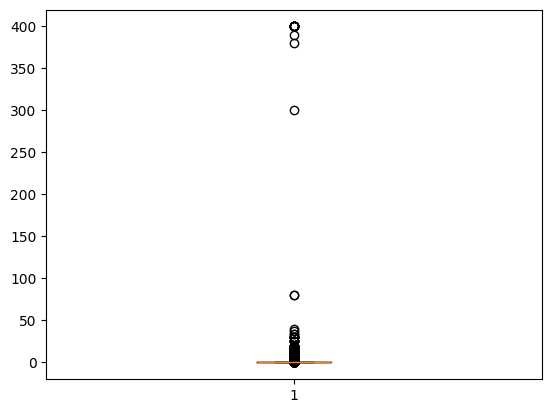

In [40]:
#Create a box plot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [41]:
#Check the apps with price more than 200
inp1.query("Price > 200")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [42]:
#Clean the Price column
inp1 = inp1.drop(index =inp1.query("Price > 200").index)
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

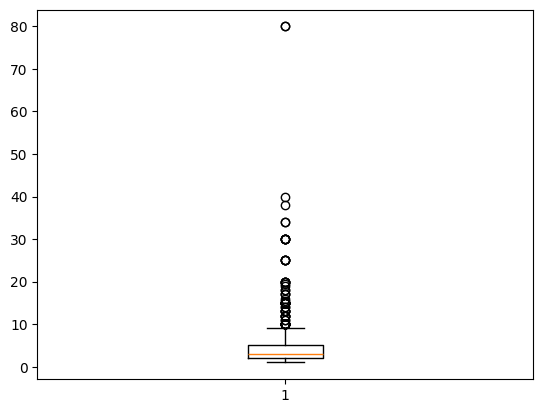

In [43]:
#Create a box plot for paid apps
#plt.boxplot(inp1['Price'][inp1['Price'] > 0])
plt.boxplot(inp1.query("Price > 0")['Price'])
plt.show()

In [44]:
#Check the apps with price more than 30
inp1.query("Price > 30")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [45]:
#Clean the Price column again
inp1 = inp1.drop(index = inp1.query("Price > 30").index)
inp1.Price.describe()

count    9338.000000
mean        0.301915
std         1.669887
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        29.990000
Name: Price, dtype: float64

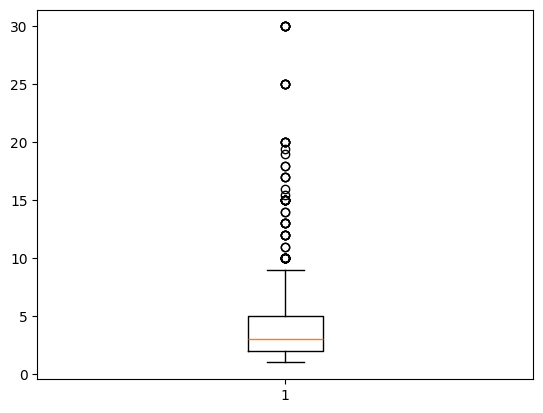

In [46]:
plt.boxplot(inp1.query("Price > 0")['Price'])
plt.show()

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

In [47]:
inp1.Reviews.describe()

count    9.338000e+03
mean     5.155891e+05
std      3.148627e+06
min      1.000000e+00
25%      1.890000e+02
50%      6.011500e+03
75%      8.247100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

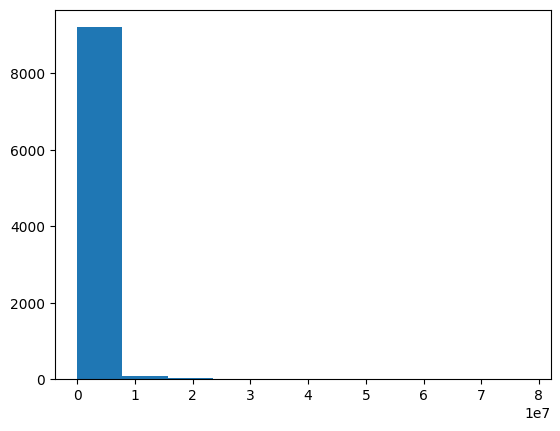

In [48]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)
plt.show()

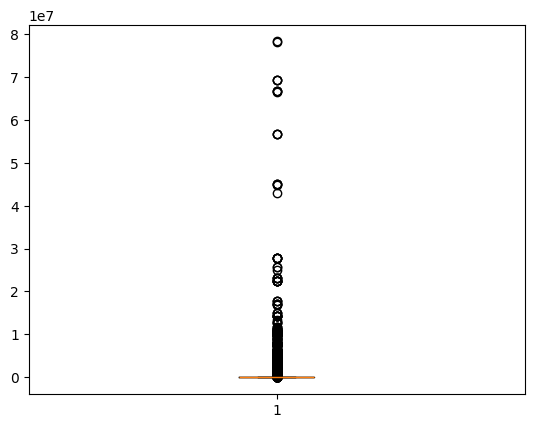

In [49]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()


In [50]:
#Check records with 1 million reviews
inp1.query('Reviews > 1000000')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [51]:
#Drop the above records
inp1 = inp1.drop(index = inp1.query('Reviews > 1000000').index)
inp1.Reviews.describe()

count      8634.000000
mean      68383.348853
std      156335.806417
min           1.000000
25%         143.250000
50%        3641.000000
75%       46070.500000
max      995002.000000
Name: Reviews, dtype: float64

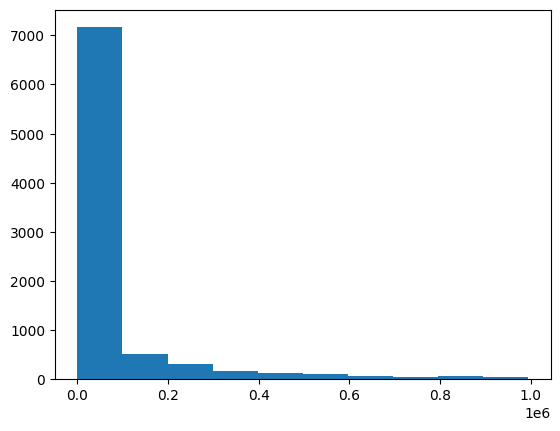

In [52]:
#Question - Create a histogram again and check the peaks
plt.hist(inp1.Reviews)
plt.show()


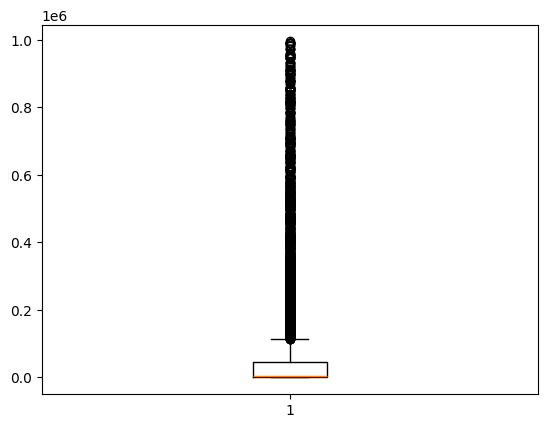

In [53]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Reviews)
plt.show()

In [54]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1 = inp1.drop(index=inp1.query('Reviews > 100000000').index)
inp1.Reviews.describe()

count      8634.000000
mean      68383.348853
std      156335.806417
min           1.000000
25%         143.250000
50%        3641.000000
75%       46070.500000
max      995002.000000
Name: Reviews, dtype: float64

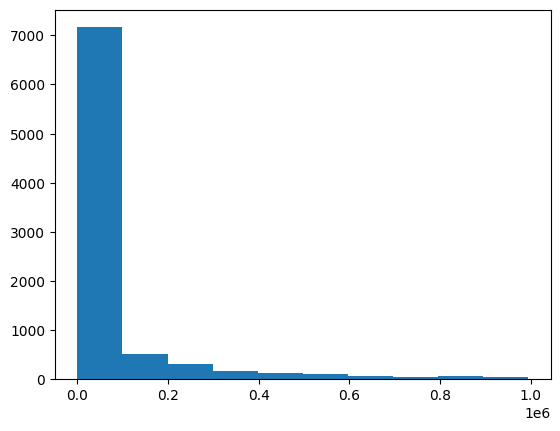

In [55]:
#Plot a histogram for Size as well.
plt.hist(inp1.Reviews)
plt.show()

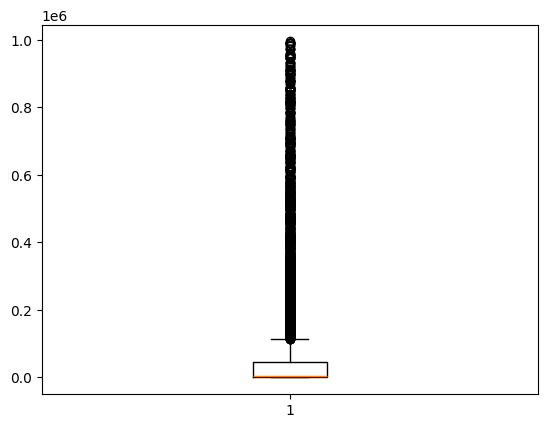

In [56]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Reviews)
plt.show()

In [57]:
IQR = inp1.Installs.quantile(.75) - inp1.Installs.quantile(.25)
IQR

np.float64(990000.0)

In [58]:
inp1.Size.describe()

count      8634.000000
mean      21636.459060
std       20663.668474
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

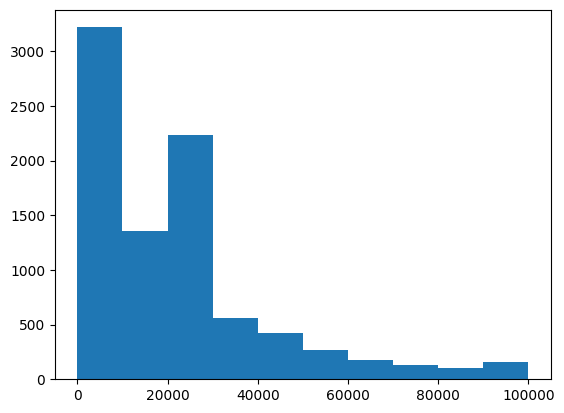

In [59]:

plt.hist(inp1.Size)
plt.show()

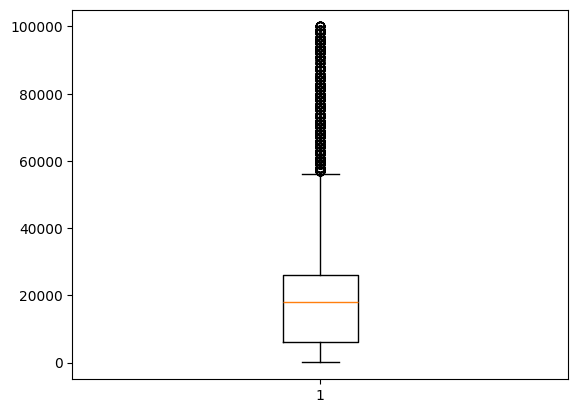

In [60]:
plt.boxplot(inp1.Size)
plt.show()

### Session 2 - Seaborn: Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [61]:
#import the necessary libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve.

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html


**sns.histplot():**

It creates a histogram for a single continuous variable.

**sns.displot():** 

This function is more flexible than sns.distplot().

It creates a complete grid of distribution plots in one go. You can use it for creating histograms, KDE plots, or other distribution visualizations.

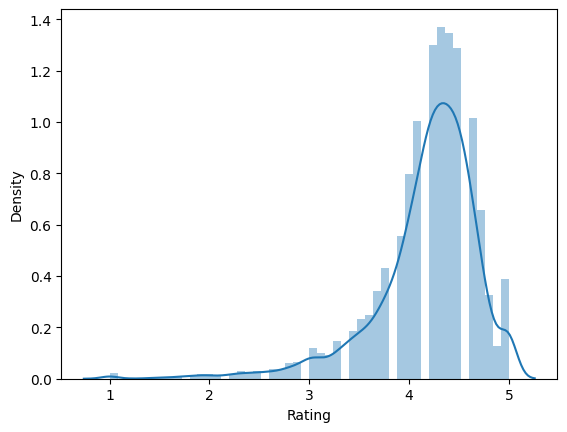

In [62]:
#Create a distribution plot for rating
# https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(inp1.Rating,kde=True)
plt.show()

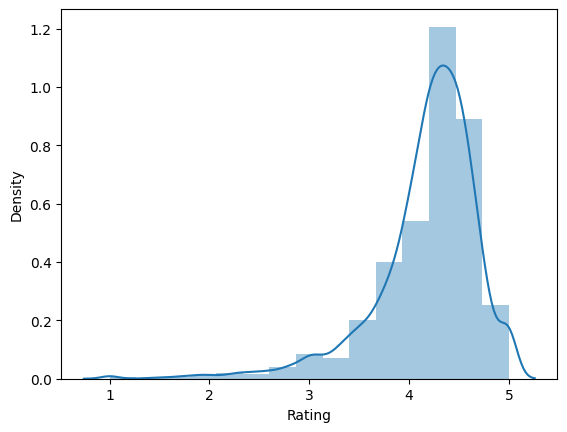

In [63]:
#Change the number of bins

sns.distplot(inp1.Rating, bins=15)
plt.show()

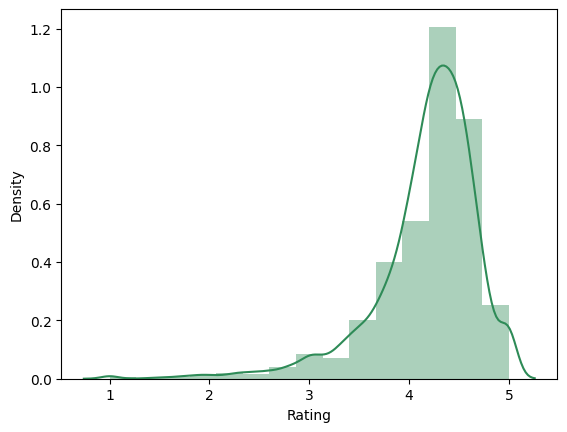

In [64]:
#Change the colour of bins to green

sns.distplot(inp1.Rating, bins=15, color='seagreen')
plt.show()

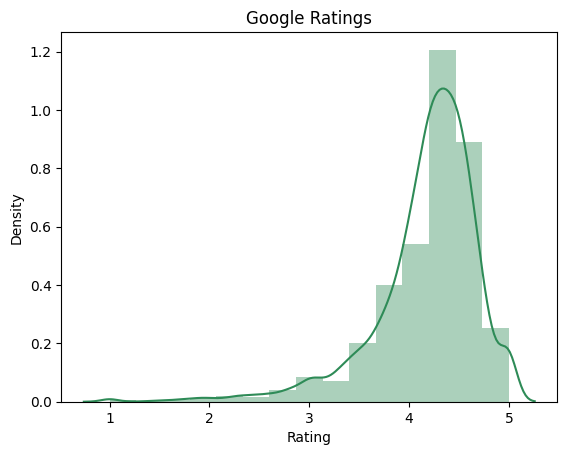

In [65]:
#Apply matplotlib functionalities
sns.distplot(inp1.Rating, bins=15, color='seagreen')
plt.title("Google Ratings")
plt.show()


#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [66]:
#Check all the styling options
? sns.set_style

Signature:  sns.set_style(style=None, rc=None)
Docstring:
Set the parameters that control the general style of the plots.

The style parameters control properties like the color of the background and
whether a grid is enabled by default. This is accomplished using the
matplotlib rcParams system.

The options are illustrated in the
:doc:`aesthetics tutorial <../tutorial/aesthetics>`.

See :func:`axes_style` to get the parameter values.

Parameters
----------
style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
    A dictionary of parameters or the name of a preconfigured style.
rc : dict, optional
    Parameter mappings to override the values in the preset seaborn
    style dictionaries. This only updates parameters that are
    considered part of the style definition.

Examples
--------

.. include:: ../docstrings/set_style.rst
File:      c:\users\ujwal\appdata\roaming\python\python313\site-packages\seaborn\rcmod.py
Type:      function

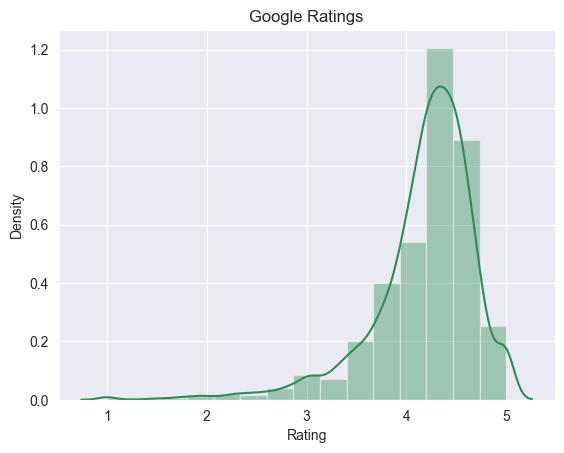

In [67]:
sns.set_style('darkgrid')
sns.distplot(inp1.Rating, bins=15, color='seagreen')
plt.title("Google Ratings")
plt.show()

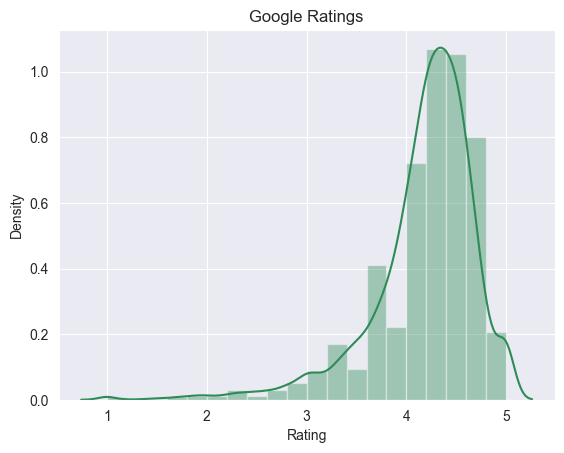

In [68]:
#Change the number of bins to 20
sns.set_style('darkgrid')
sns.distplot(inp1.Rating, bins=20, color='seagreen')
plt.title("Google Ratings")
plt.show()

In [69]:
# check styles available with matpotlib

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

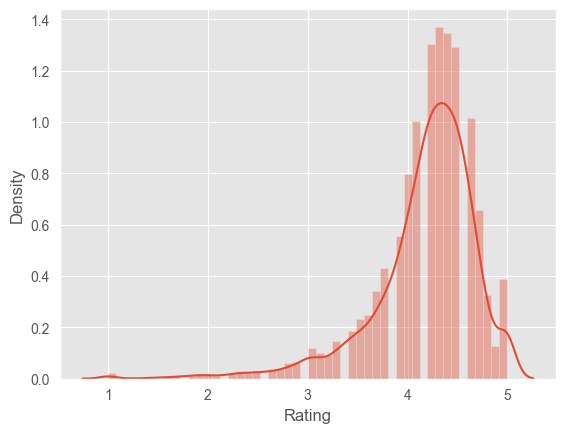

In [70]:
plt.style.use('ggplot')
sns.distplot(inp1.Rating)

plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [71]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Content Rating
Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [72]:
#Remove the rows with values which are less represented

#find method 1
inp1.query("`Content Rating` in ['Adults only 18+','Unrated']")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [73]:
#find method 2
inp1[inp1['Content Rating'].isin(['Adults only 18+','Unrated'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [74]:
#remove record
inp1 = inp1.drop(index = inp1.query("`Content Rating` in ['Adults only 18+','Unrated']").index)
inp1['Content Rating'].value_counts()

Content Rating
Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: count, dtype: int64

In [75]:
#index is not contageous
inp1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8630 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8630 non-null   object 
 1   Category        8630 non-null   object 
 2   Rating          8630 non-null   float64
 3   Reviews         8630 non-null   int32  
 4   Size            8630 non-null   float64
 5   Installs        8630 non-null   int32  
 6   Type            8630 non-null   object 
 7   Price           8630 non-null   float64
 8   Content Rating  8630 non-null   object 
 9   Genres          8630 non-null   object 
 10  Last Updated    8630 non-null   object 
 11  Current Ver     8630 non-null   object 
 12  Android Ver     8630 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 876.5+ KB


In [76]:
#Reset the index
inp1.reset_index(inplace=True, drop=True)
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8630 non-null   object 
 1   Category        8630 non-null   object 
 2   Rating          8630 non-null   float64
 3   Reviews         8630 non-null   int32  
 4   Size            8630 non-null   float64
 5   Installs        8630 non-null   int32  
 6   Type            8630 non-null   object 
 7   Price           8630 non-null   float64
 8   Content Rating  8630 non-null   object 
 9   Genres          8630 non-null   object 
 10  Last Updated    8630 non-null   object 
 11  Current Ver     8630 non-null   object 
 12  Android Ver     8630 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 809.2+ KB


In [77]:
#Check the apps belonging to different categories of Content Rating
inp1.groupby('Content Rating')['App'].apply(list)

Content Rating
Everyone        [Photo Editor & Candy Camera & Grid & ScrapBoo...
Everyone 10+    [Superheroes Wallpapers | 4K Backgrounds, Poli...
Mature 17+      [Dresses Ideas & Fashions +3000, Read books on...
Teen            [Sketch - Draw & Paint, Tattoo Name On My Phot...
Name: App, dtype: object

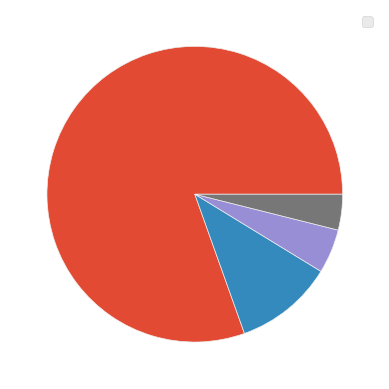

In [78]:
#Plot a pie chart
plt.pie(inp1['Content Rating'].value_counts())
#plt.pie(inp1['Content Rating'].value_counts(), labels=inp1['Content Rating'].value_counts().index)
plt.legend()
plt.show()


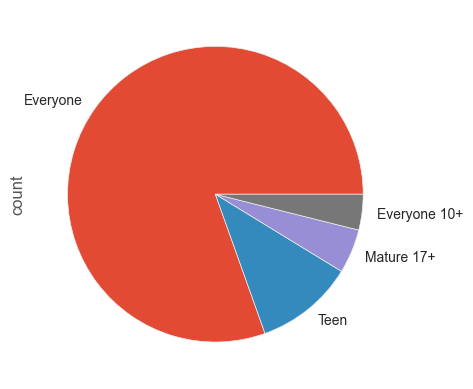

In [79]:
inp1['Content Rating'].value_counts().plot.pie()
plt.show()

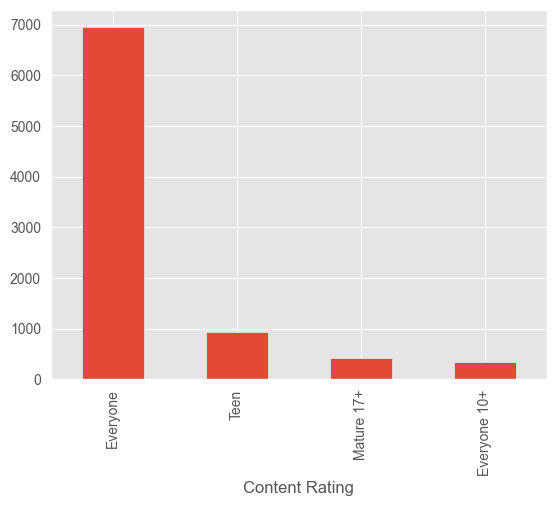

In [80]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

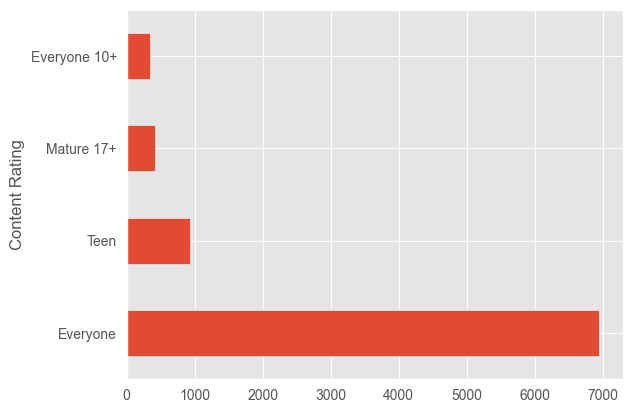

In [81]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

<Axes: xlabel='Android Ver'>

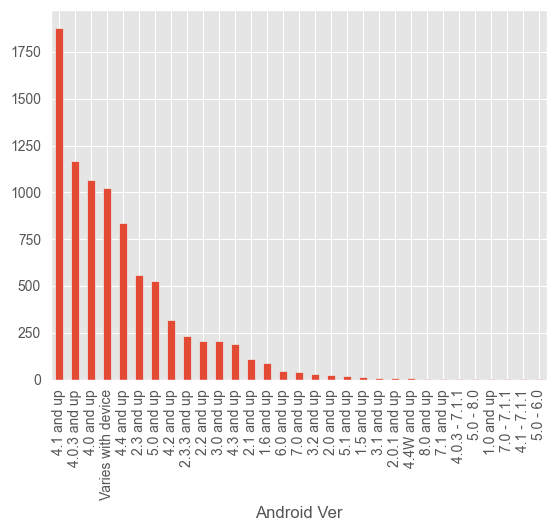

In [82]:
#Question - Plot a bar plot for apps belonging to different types of ‘Android Ver’ and report back the category at the 4th highest peak.
inp1['Android Ver'].value_counts().plot.bar()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot.

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

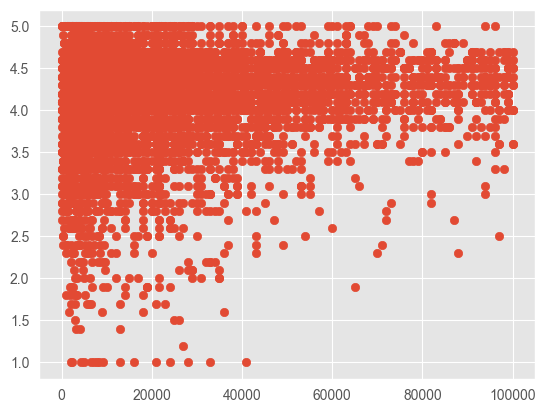

In [83]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

In [84]:
### Plot the same thing now using a jointplot
?sns.jointplot

Signature:
sns.jointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    color=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that s

<function matplotlib.pyplot.show(close=None, block=None)>

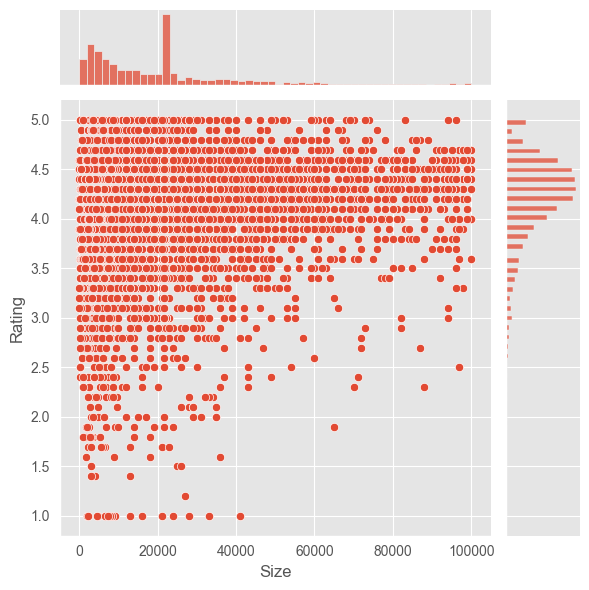

In [85]:
sns.jointplot(x =inp1.Size, y=inp1.Rating)
plt.show

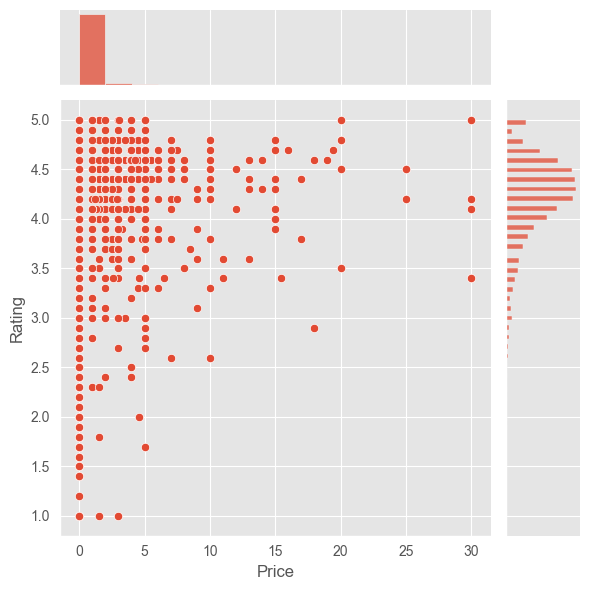

In [86]:
#better way 
sns.jointplot(x ='Price', y='Rating', data=inp1)
plt.show()

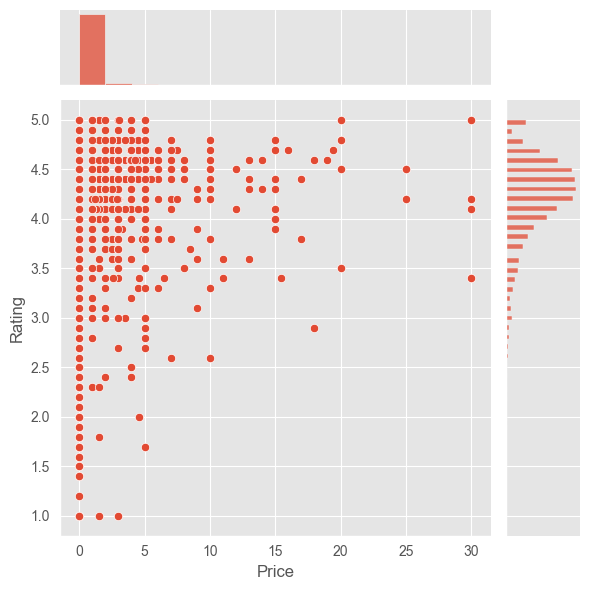

In [87]:
## Plot a jointplot for Price and Rating
sns.jointplot(x =inp1.Price, y=inp1.Rating)
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view

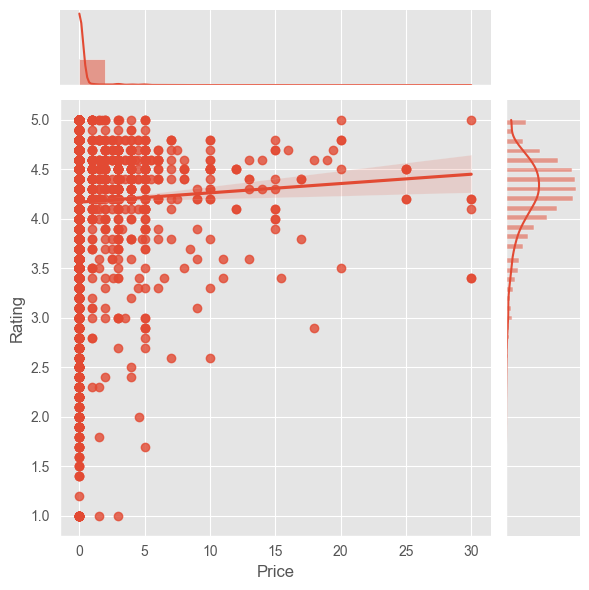

In [88]:
##Plot a reg plot for Price and Rating and observe the trend

sns.jointplot(x =inp1.Price, y=inp1.Rating, kind="reg")
plt.show()

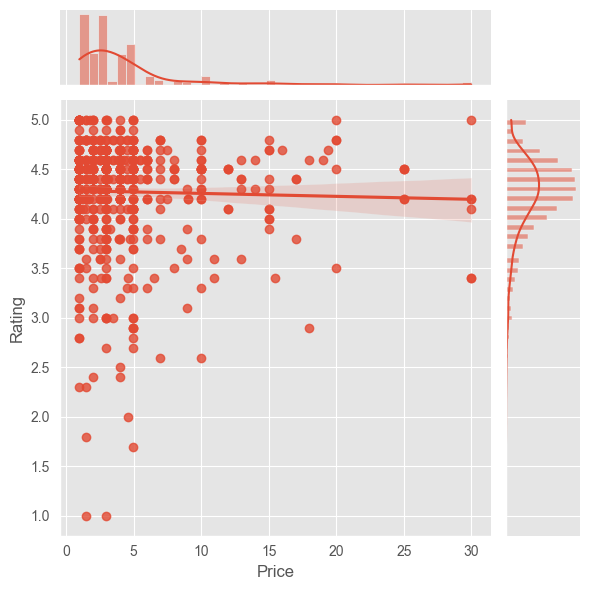

In [89]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot(x =inp1.query("Price > 0").Price, y=inp1.Rating, kind="reg")
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

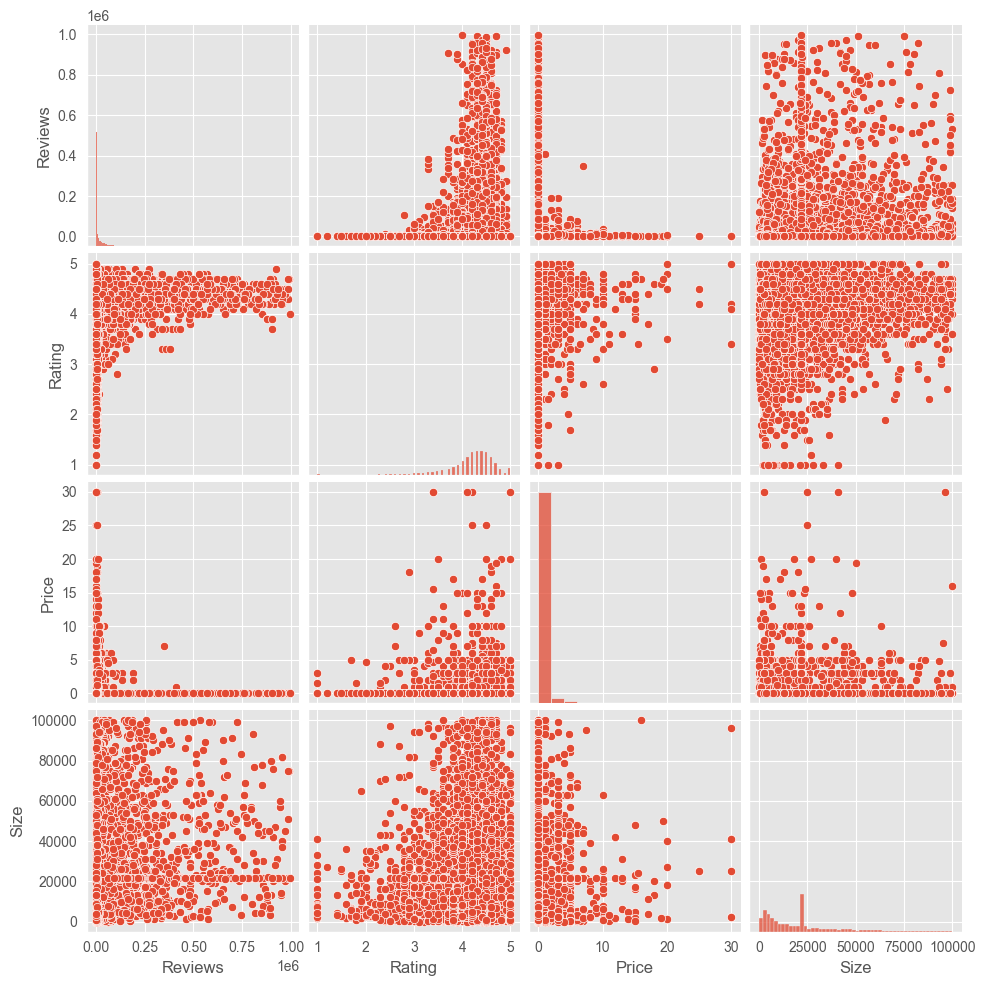

In [90]:
## Create a pair plot for Reviews, Size, Price and Rating

sns.pairplot(inp1[['Reviews','Rating','Price','Size']])
plt.show()

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<Axes: xlabel='Content Rating'>

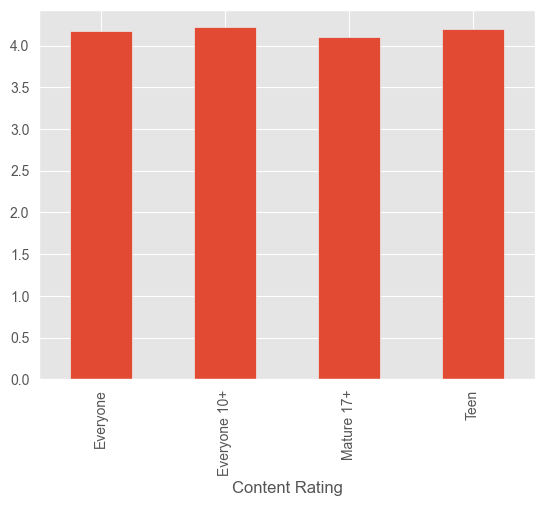

In [91]:
##Plot a bar plot of Content Rating vs Average Rating
inp1.groupby('Content Rating')['Rating'].mean().plot.bar()

<Axes: xlabel='Content Rating'>

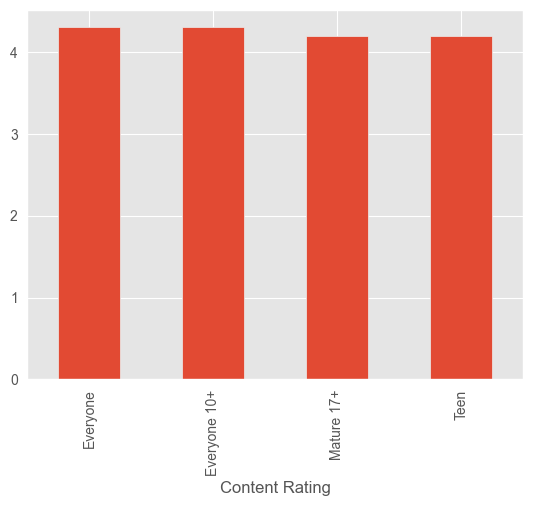

In [92]:
##Plot the bar plot again with Median Rating
inp1.groupby('Content Rating')['Rating'].median().plot.bar()

<Axes: xlabel='Content Rating', ylabel='Rating'>

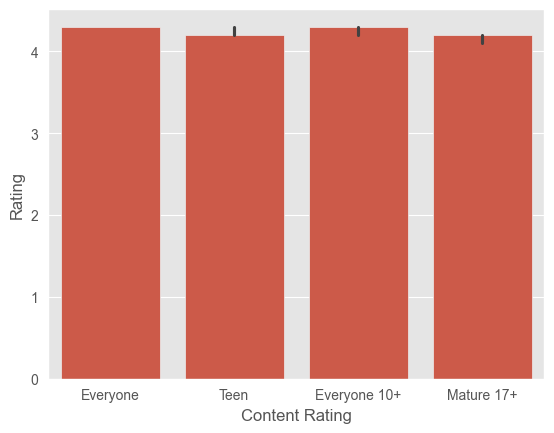

In [93]:
##Plot the above bar plot using the estimator parameter
sns.barplot(inp1, x = 'Content Rating', y='Rating', estimator=np.median)


<Axes: xlabel='Content Rating', ylabel='Rating'>

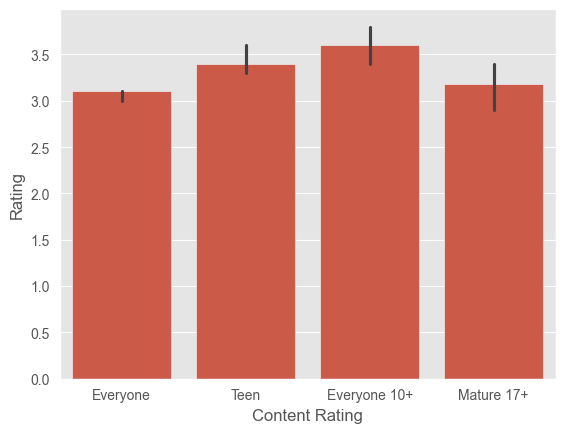

In [94]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1, x = 'Content Rating', y='Rating', estimator=lambda x: np.quantile(x,0.05))

<Axes: xlabel='Content Rating', ylabel='Rating'>

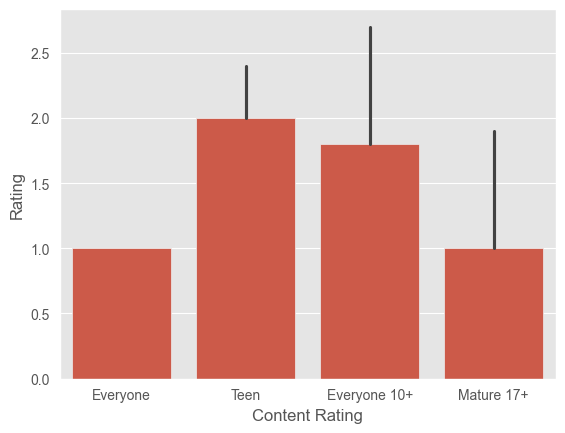

In [95]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp1, x = 'Content Rating', y='Rating', estimator=np.min)

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




<Axes: xlabel='Content Rating', ylabel='Rating'>

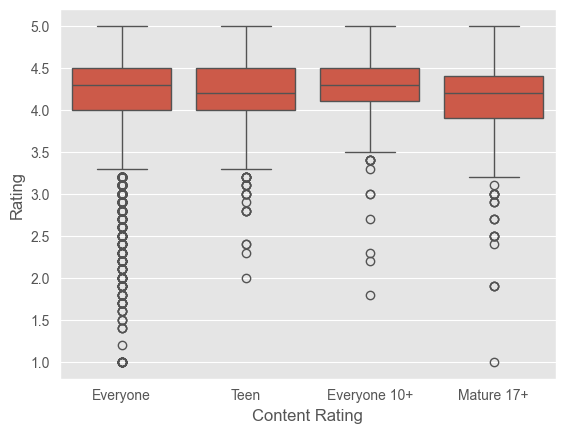

In [96]:
##Plot a box plot of Rating vs Content Rating
sns.boxplot(data=inp1, x = 'Content Rating', y='Rating')

<Axes: ylabel='Rating'>

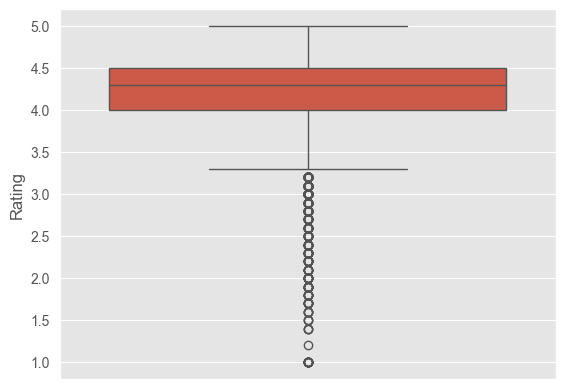

In [97]:
##Question - Plot a box plot for the Rating column only
sns.boxplot(data=inp1, y = 'Rating')

<Axes: xlabel='Genres', ylabel='Rating'>

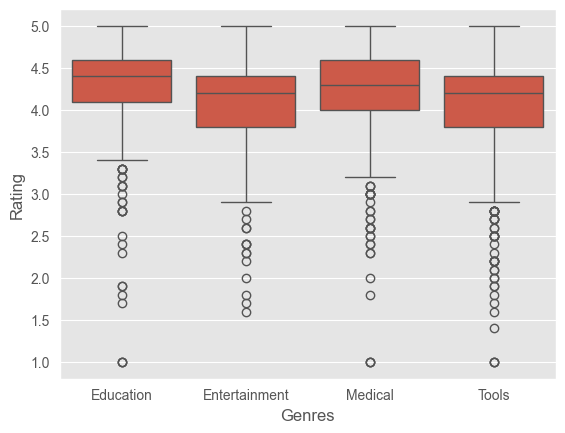

In [98]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
topgeners = inp1['Genres'].value_counts().index[:4]
df = inp1[inp1['Genres'].isin(topgeners)]

sns.boxplot(data=df, y='Rating', x='Genres')


#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [99]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut
?pd.qcut


Signature:
pd.qcut(
    x,
    q,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    duplicates: 'str' = 'raise',
)
Docstring:
Quantile-based discretization function.

Discretize variable into equal-sized buckets based on rank or based
on sample quantiles. For example 1000 values for 10 quantiles would
produce a Categorical object indicating quantile membership for each data point.

Parameters
----------
x : 1d ndarray or Series
q : int or list-like of float
    Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
    array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
labels : array or False, default None
    Used as labels for the resulting bins. Must be of the same length as
    the resulting bins. If False, return only integer indicators of the
    bins. If True, raises an error.
retbins : bool, optional
    Whether to return the (bins, labels) or not. Can be useful if bins
    is given as a scalar.
precision : int, optional
    

In [100]:
inp1['size_bucket'] = pd.qcut(inp1.Size,[0,.2,.4,.6,.8,1],['VL','L','M','H','VH'])
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [101]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp1, index='Content Rating', columns='size_bucket', values='Rating')

size_bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215699,4.170799,4.187396
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.138408,4.198131,4.246154


In [102]:
##Change the aggregation to median
pd.pivot_table(data=inp1, index='Content Rating', columns='size_bucket', values='Rating', aggfunc='median')

size_bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [103]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1, index='Content Rating', columns='size_bucket', values='Rating', aggfunc=lambda x: np.quantile(x,0.25))

size_bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.90,4.00,4.1,4.0,4.0
Everyone 10+,3.95,4.05,4.1,4.0,4.0
Mature 17+,3.40,3.90,3.9,3.9,4.0
Teen,3.90,4.00,3.9,4.0,4.1


In [104]:
##Store the pivot table in a separate variable
newdf = pd.pivot_table(data=inp1, index='Content Rating', columns='size_bucket', values='Rating', aggfunc=lambda x: np.quantile(x,0.25))

In the above  you were introduced to the concept of binning, where you convert a numeric variable to a categorical variable by bucketing a specific range of values. This is pretty useful during analyses where you can create useful buckets and analyse how some other variable changes across those buckets.

One of the most common examples of **binning happens in demographic survey datasets** (like Census or Market research surveys) that contain the Age column, where people can be categorised as **Under-12, 12-17, 18-24 and so on**. Despite the actual age of the person being a numeric value, it's much easier to analyse across buckets and gather insights( like asking how many people in the 12-17 age bucket have gone to school, how many of them prefer a particular brand over the other and so on).



For binning purposes, you utilised the pd.qcut method, which divided the entire Size column to the following buckets on the basis of the percentiles. Note that pd.qcut takes percentile values in decimals, as in 20th percentile becomes 0.2, 40th percentile becomes 0.4 and so on.

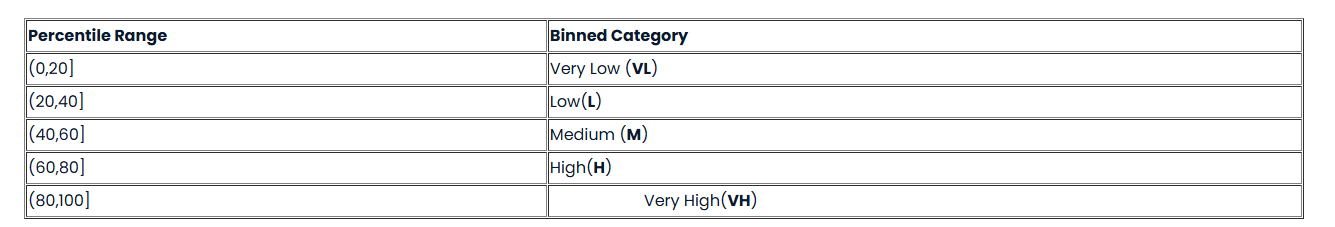


The above bins were now used to create the new column called Size_Bucket which stored the binned categories corresponding to the size of each app. Now finally when you prepare the pivot table (corresponding to the aggregation at 20th percentile for ratings), you'll get a grid as follows..


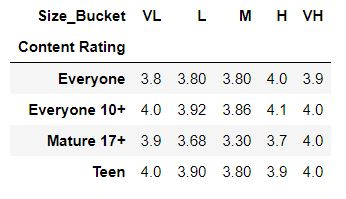




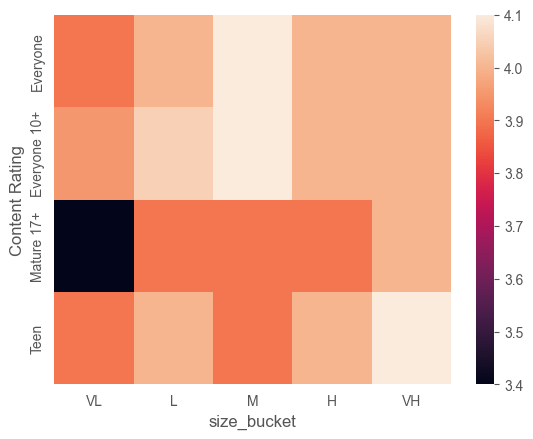

In [105]:
##Plot a heat map
sns.heatmap(newdf)
plt.show()

<Axes: xlabel='size_bucket', ylabel='Content Rating'>

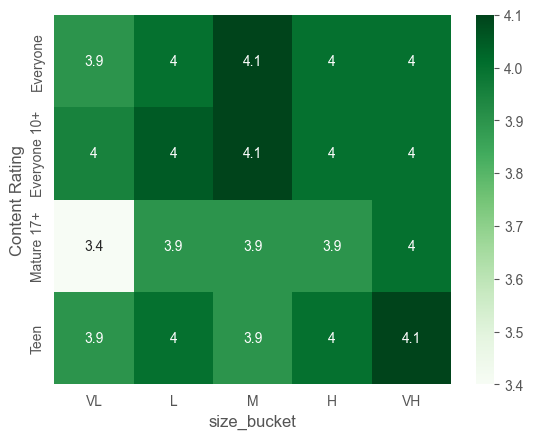

In [106]:
##Apply customisations
sns.heatmap(newdf, cmap='Greens', annot=True)

In [107]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating

inp1['Review_buckets'] = pd.qcut(inp1.Reviews,[0,.2,.4,.6,.8,1],['VL','L','M','H','VH'])
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_bucket,Review_buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,L
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,L
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,VH
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,VH
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,L


<Axes: xlabel='size_bucket', ylabel='Review_buckets'>

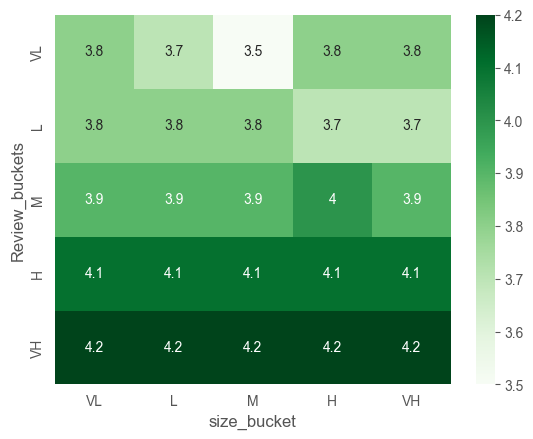

In [108]:
newdf2 = pd.pivot_table(data=inp1, index='Review_buckets', columns='size_bucket', values='Rating', aggfunc=lambda x: np.quantile(x,0.25))
sns.heatmap(newdf2, cmap='Greens', annot=True)

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [109]:
## Extract the month from the Last Updated Date

inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
size_bucket       category
Review_buckets    category
dtype: object

In [110]:
## Find the average Rating across all the months
inp1['updated_month']=pd.to_datetime(inp1['Last Updated']).dt.month
plt.figure(figsize=[10,5])
inp1.groupby('updated_month')['Rating'].mean()



updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153308
6     4.172590
7     4.222999
8     4.269286
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

<Figure size 1000x500 with 0 Axes>

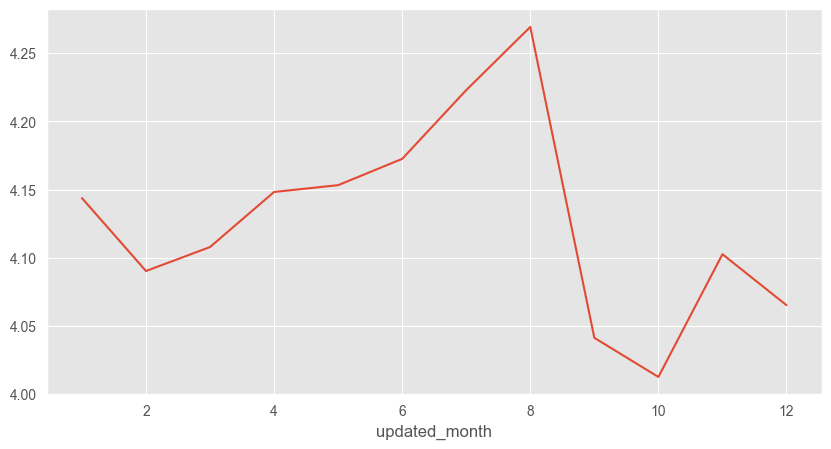

In [111]:
## Plot a line graph
## Find the average Rating across all the months
inp1['updated_month']=pd.to_datetime(inp1['Last Updated']).dt.month
plt.figure(figsize=[10,5])
inp1.groupby('updated_month')['Rating'].mean().plot()
plt.show()



#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [112]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(inp1,  index='updated_month', columns='Content Rating', values='Installs',aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,2361067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,8271109680,456556000,419491910,1943556800
8,7430943320,215821000,312981700,6257855650
9,260340410,24931100,2201010,22483100


In [113]:
##Store the table in a separate variable
df3 = pd.pivot_table(inp1, values='Installs', index='updated_month', columns='Content Rating', aggfunc=sum)

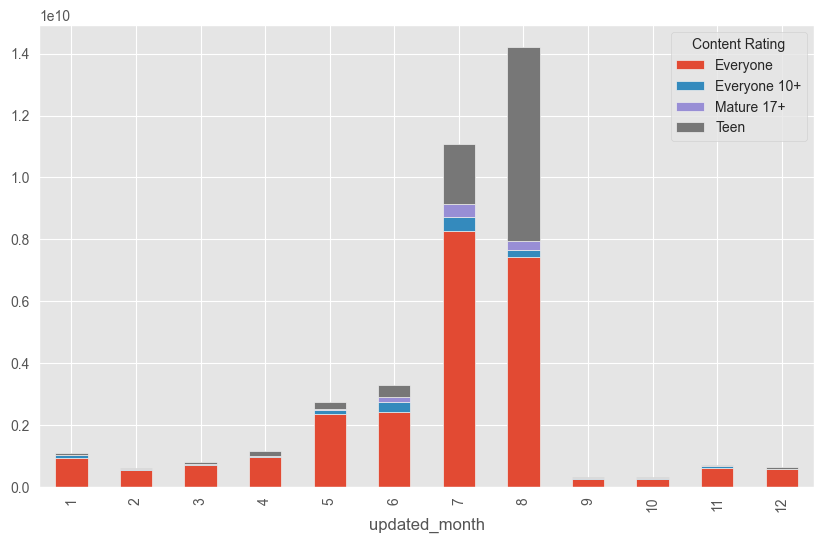

In [114]:
##Plot the stacked bar chart.
df3.plot(kind='bar', stacked='True', figsize=[10,6])
plt.show()

In [119]:
##Plot the stacked bar chart again wrt to the proportions.

# .apply(function, axis=1)
# .apply() applies a function to either rows (axis=1) or columns (axis=0) of a DataFrame.

# Here, axis=1 means apply the function to each row.

# ✅ lambda x: x / x.sum()
# This is an anonymous function that:

# Takes a row (x) as input.

# Computes the sum of all values in that row: x.sum().

# Divides each element in the row by that sum: x / x.sum().

df4 = df3[['Everyone','Everyone 10+','Mature 17+','Teen']].apply(lambda x: x/x.sum(), axis=1)

In [116]:
df4.apply(lambda x: x/x.sum(), axis=1)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,0.853262,0.097076,0.008945,0.040717
2,0.882747,0.032083,0.021077,0.064093
3,0.853576,0.037222,0.011184,0.098018
4,0.836553,0.020025,0.004520,0.138902
5,0.864204,0.043254,0.018352,0.074189
6,0.734200,0.096110,0.043939,0.125751
7,0.745769,0.041166,0.037824,0.175242
8,0.522658,0.015180,0.022014,0.440148
9,0.839928,0.080434,0.007101,0.072537


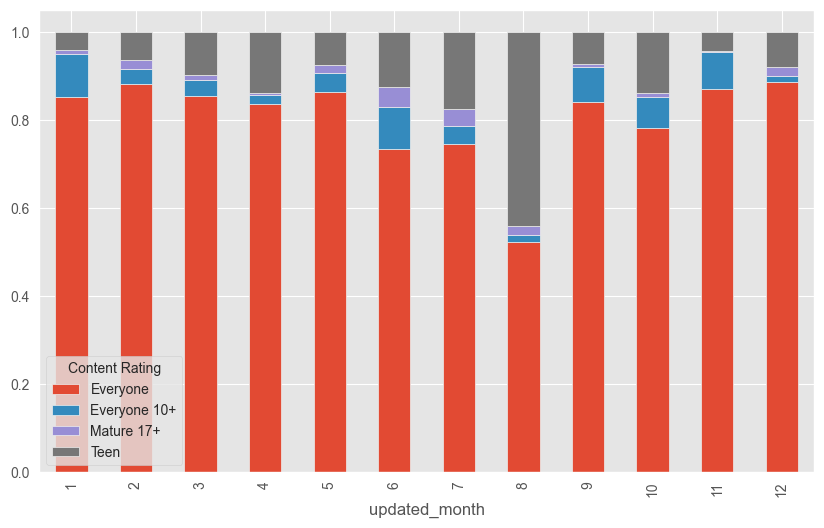

In [120]:
##Plot the stacked bar chart.
df4.plot(kind='bar', stacked='True', figsize=[10,6])
plt.show()

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [121]:
#Install plotly


In [122]:
#Take the table you want to plot in a separate variable
df5 = inp1.groupby(['updated_month'])[['Rating']].mean()

In [123]:
df5.reset_index(inplace=True)
df5

,updated_month,Rating
0,1,4.143842
1,2,4.090385
2,3,4.107963
3,4,4.148326
4,5,4.153308
5,6,4.172590
6,7,4.222999
7,8,4.269286
8,9,4.041406
9,10,4.012739


In [ ]:
#Import the plotly libraries
import plotly.express as pt

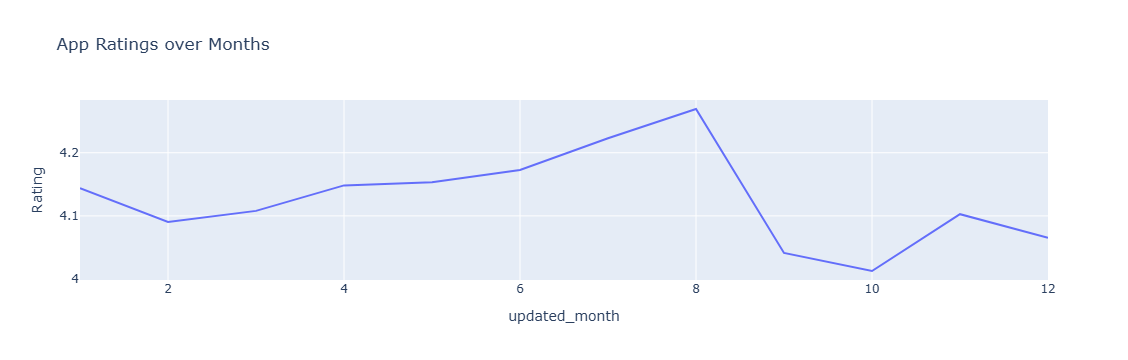

In [130]:
#Prepare the plot
fig = pt.line(df5, y='Rating',x='updated_month', title='App Ratings over Months')
fig.show()

Summary of case study:

1. First, you did a fair bit of data handling and cleaning - cleaning junk records, adding missing values, changing data types, remove outliers, etc.
2. When you analysed the ratings using the histogram, you saw that they are skewed towards higher ratings.
3. Using a bar chart, you saw that most of the apps belong to the Everyone category.
4. You also observed a weak trend between the ratings and the size of the app, using a scatter-plot. You also briefly forayed to reg plots to understand its nuances.
5. Using a pair-plot, you were able to see multiple scatter plots and draw several inferences, for example, price and rating having very weak trend, reviews and price being inversely related and so on.
6. After that, you utilised estimator functions along with bar plots as well as box plots to observe the spread of ratings across the different Content Rating Categories. Here, your main observation was that Everyone category has a lot of apps having very low ratings.
7. Finally, you created a heat map comparing the ratings across different Reviews and Content Rating buckets.